In [1]:
import pandas as pd
import numpy as np
import warnings
from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryInspectionStrategy
from analyze_src.missing_value_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalFeatureAnalysisStrategy, CategoricalFeatureAnalysisStrategy
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import MultivariateAnalysis

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore")

## **1. Loading Data**

In [2]:
# assuming the data is aleady extacted into 'extracted_data' folder
data_path = "../extracted_data/cardekho_dataset.csv"
df = pd.read_csv(data_path, index_col=[0])

## **2. Basic Data Inspection**

### **2.1 Data Type Inspection**

In [3]:
# initialize data inspector with a strategy for data types inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB
None


### **2.2 Summary Statistics**

In [4]:
data_inspector.set_strategy(SummaryInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
        vehicle_age     km_driven       mileage        engine     max_power  \
count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000   
mean       6.036338  5.561648e+04     19.701151   1486.057751    100.588254   
std        3.013291  5.161855e+04      4.171265    521.106696     42.972979   
min        0.000000  1.000000e+02      4.000000    793.000000     38.400000   
25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000   
max       29.000000  3.800000e+06     33.540000   6592.000000    626.000000   

              seats  selling_price  
count  15411.000000   1.541100e+04  
mean       5.325482   7.749711e+05  
std        0.807628   8.941284e+05  
min        0.000000   4.000000e+04  
25%        5.000000   3.850000e+05  
50%        5.000000   5.

# Insights

### ***Feature Information***

- **car_name**: Car's Full name, which includes brand and specific model name.
- **brand**: Brand Name of the particular car.
- **model**: Exact model name of the car of a particular brand.
- **seller_type**: Which Type of seller is selling the used car
- **fuel_type**: Fuel used in the used car, which was put up on sale.
- **transmission_type**: Transmission used in the used car, which was put on sale.
- **vehicle_age**: The count of years since car was bought.
- **mileage**: It is the number of kilometer the car runs per litre.
- **engine**: It is the engine capacity in cc(cubic centimeters)
- **max_power**: Max power it produces in BHP.
- **seats**: Total number of seats in car.
- **selling_price**: The sale price which was put up on website.

## **1. Data Types and Non-Null Counts**

- There was 15411 rows and 13 columns in the dataset

- **Data Types**:  The dataset contains a mix of numerical and categorical data types. There are 7 numerical features and 6 categorical features.

    - Numerical features are: `vehicle_age`, `km_driven`, `mileage`, `engine`, `max_power`, `seats`, `selling_price`

    - Categorical features are: `car_name`, `brand`, `model`, `seller_type`, `fuel_type`, `transmission_type`

- **Non-Null Counts**: All features have non-null counts of 15411, indicating that there are no missing values in the dataset.

## **2. Summary Statistics**

- **Numerical Features**:

    - `vehicle_age`: The average vehicle age is 6 years, with a standard deviation of 3 years. The minimum age is 0 years, and the maximum age is 29 years.

    - `km_driven`: The average distance driven is 55,000 km, with a standard deviation of 51,000 km. The minimum distance driven is 100 km, and the maximum distance driven is 38,00,000 km.

    - `mileage`: The average mileage is 19.7 km/l, with a standard deviation of 4.1 km/l. The minimum mileage is 4 km/l, and the maximum mileage is 33.5 km/l.

    - `engine`: The average engine capacity is close to 1,500 cc, with a standard deviation of 521 cc. The minimum engine capacity is 793 cc, and the maximum engine capacity is 6,592 cc.

    - `max_power`: The average maximum power is 100 BHP, with a standard deviation of 42 BHP. The minimum maximum power is 38.4 BHP, and the maximum maximum power is 626 BHP.

    - `seats`: The average number of seats is 5, with a standard deviation of 1. The minimum number of seats is 2, and the maximum number of seats is 9.

    - `selling_price`: The average selling price is 7,50,000 INR, with a standard deviation of 8,95,000 INR. The minimum selling price is 40,000 INR, and the maximum selling price is 3,95,00,000 INR.

- **Categorical Features**:
    - `car_name` is just the information combining `Brand` and `Model`.

    - `brand`: There are 31 unique car brands.

    - `seller_type`: There are 3 unique seller types.

    - `fuel_type`: There are 5 unique fuel types.
    
    - `transmission_type`: There are 2 unique transmission types.

## **3. Missing Value Analysis**


Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


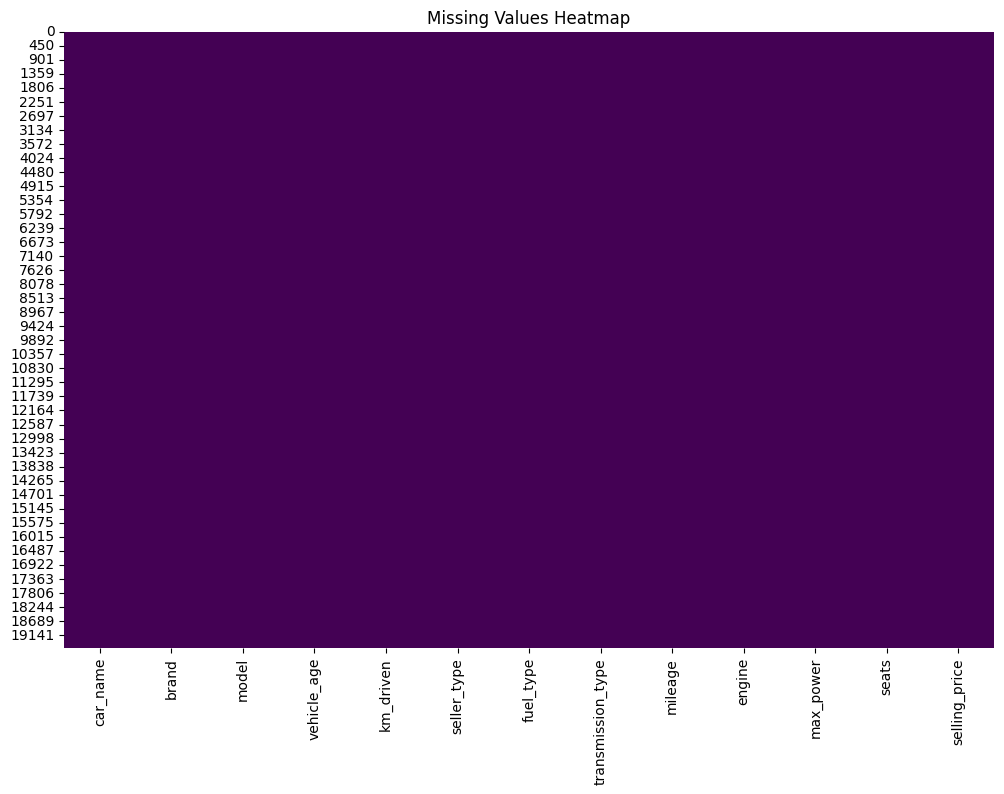

In [5]:
# perform missing value analysis
missing_value_analyzer = SimpleMissingValuesAnalysis()
missing_value_analyzer.analyze(df)

## **4. Univariate Analysis**

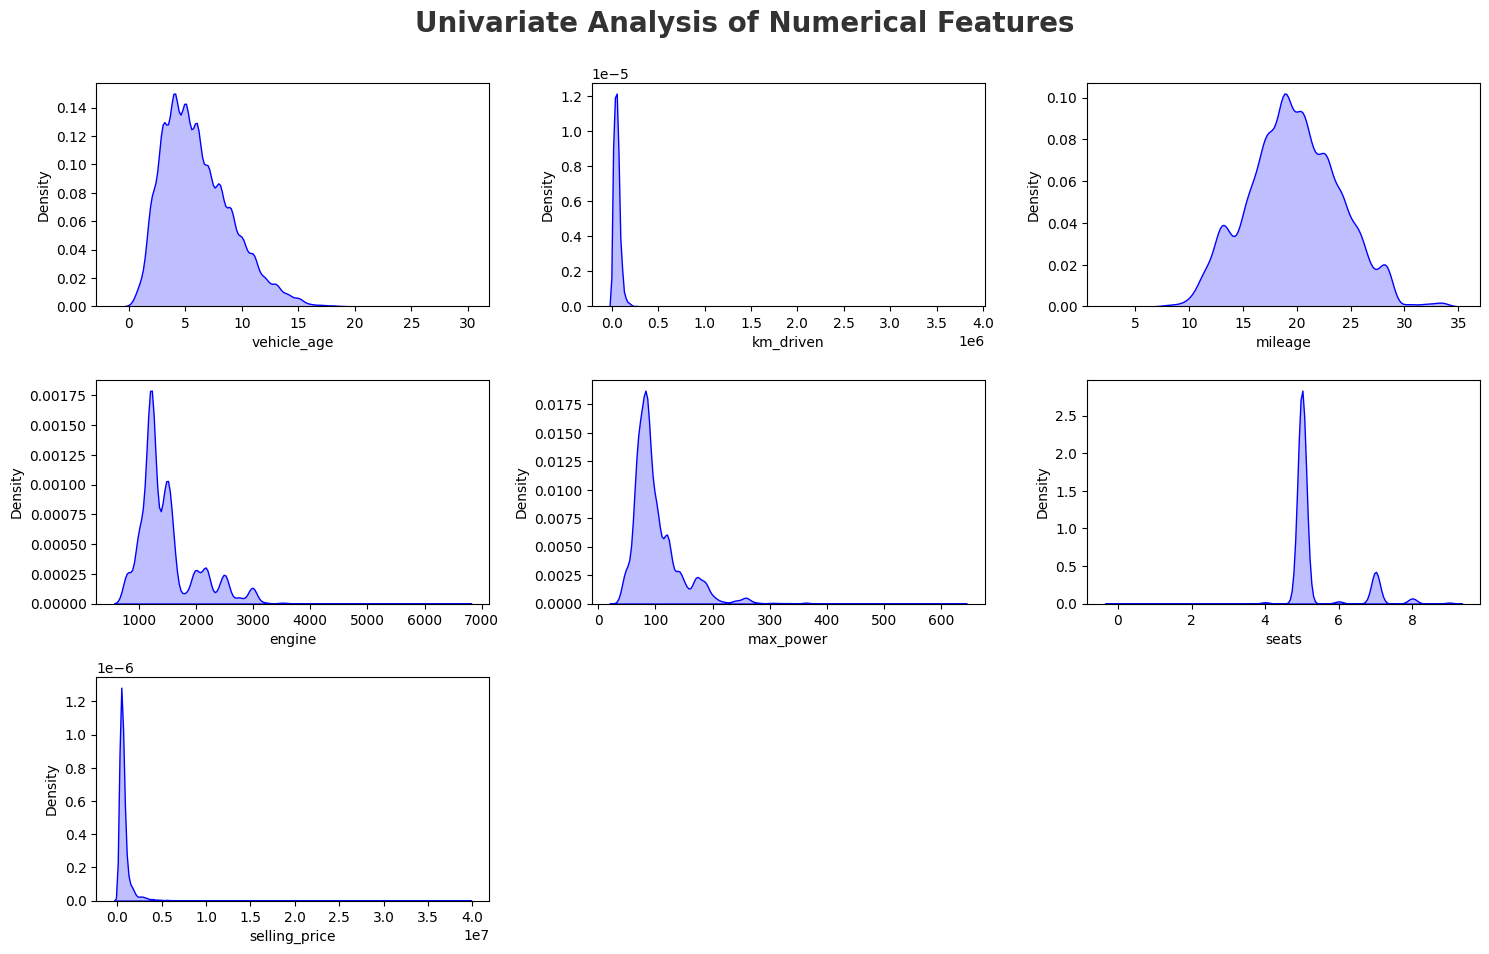

In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
univariate_analyzer = UnivariateAnalyzer(NumericalFeatureAnalysisStrategy())
univariate_analyzer.execute_analysis(df, numerical_features)

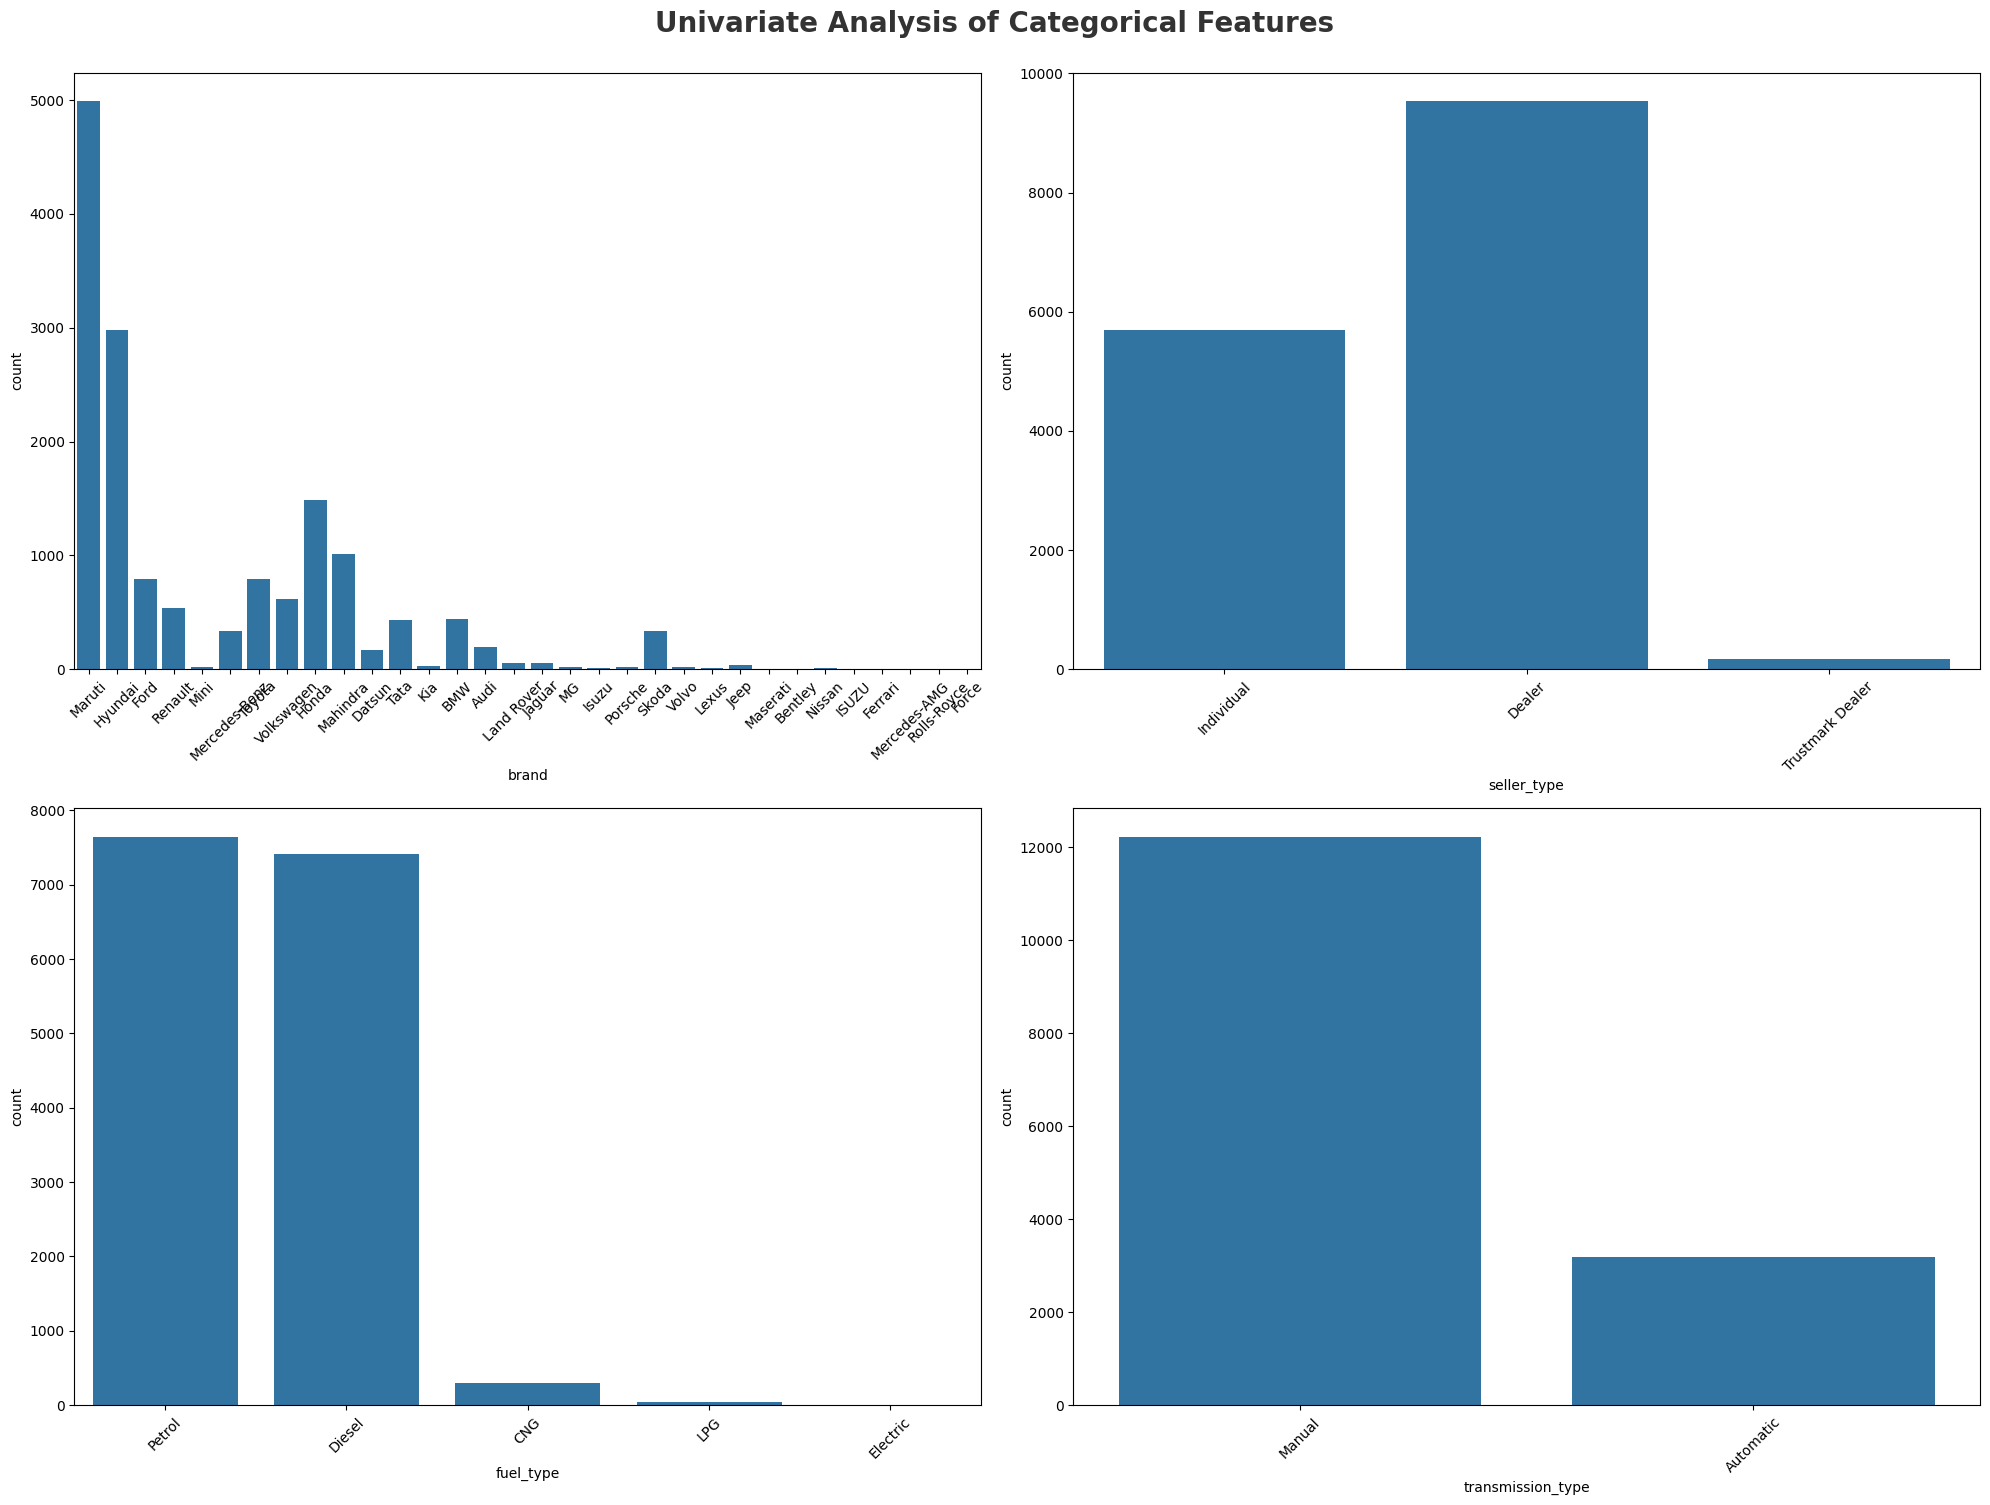

In [7]:
# Analyzing a Categorical Feature
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# removing unwanted/repeated features
categorical_features_new = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
univariate_analyzer.set_strategy(CategoricalFeatureAnalysisStrategy())
univariate_analyzer.execute_analysis(df, categorical_features_new)

### **Insights from Univariate Analysis**
1. `vehicle_age` 

    - **Skewed right**: Most vehicles are relatively new, with a sharp drop after ~5 years.

    - **Insight**: Newer cars dominate the dataset, and older cars are less frequently sold.

2. `km_driven`

    - **Highly skewed right**: Most vehicles have low km driven, with a few having very high km driven.

    - **Insight**: The majority of cars have reasonable usage. Outliers with extreme km could be fleet or taxi vehicles.

3. `mileage`

    - **Roughly normal distribution**: peaking around 18–22 kmpl.

    - **Insight**: Most cars in the dataset are fairly fuel-efficient.

4. `engine`

    - **Multi-modal & skewed right**: Peaks around 1200cc, 1500cc, and 2000cc.

    - **Insight**: Cars with these engine sizes are more common (probably hatchbacks, sedans, and SUVs).

5. `max_power`

    - **Similar to engine**: Skewed right with clear peaks.

    - **Insight**: Certain power ranges are more common, aligning with car types (e.g., city cars vs performance vehicles).

6. `seats`

    - Strong peak at 5 seats, minor ones at 7 and 8.

    - **Insight**: 5-seaters dominate the market, typical of sedans/hatchbacks. SUVs and MUVs form smaller clusters.

7. `selling_price`

    - **Very highly skewed right**: Most cars are priced at the lower end.

    - **Insight**: Dataset is skewed towards budget and mid-range cars; a few high-end luxury models act as outliers.

### **Overall Takeaways**:

   - Right-skewed distributions dominate, indicating the presence of outliers and non-uniform spread.

   - Common car profile: A 5-seater, ~5-year-old car with ~20 kmpl mileage, ~1200-1500cc engine, and moderate km driven.

**Next steps:**

- Consider log transformations for skewed variables.

- Outlier treatment may be required before model training.

- Clustering could reveal car categories (budget, mid-range, premium).

## **5. Bivariate Analysis**

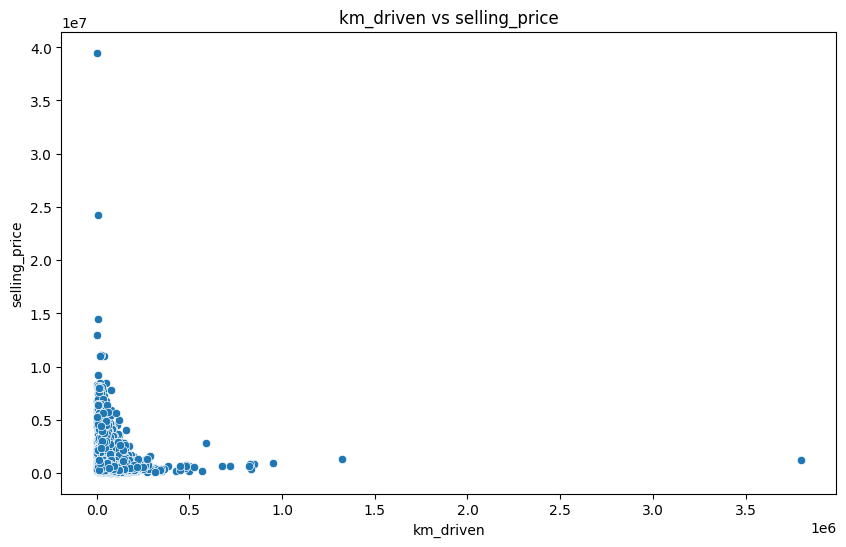

In [8]:
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'km_driven', 'selling_price')

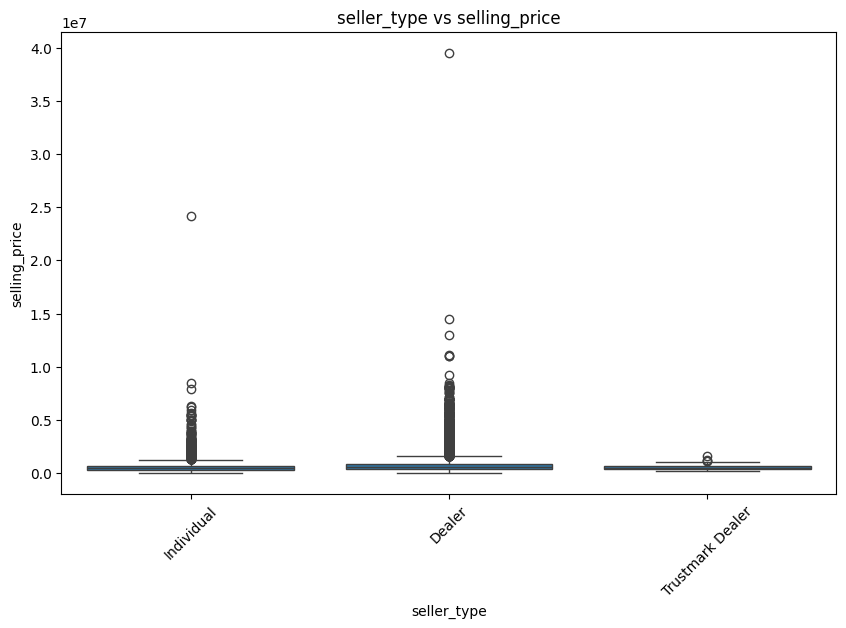

In [9]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'seller_type', 'selling_price')

## **6. Multivariate Analysis**

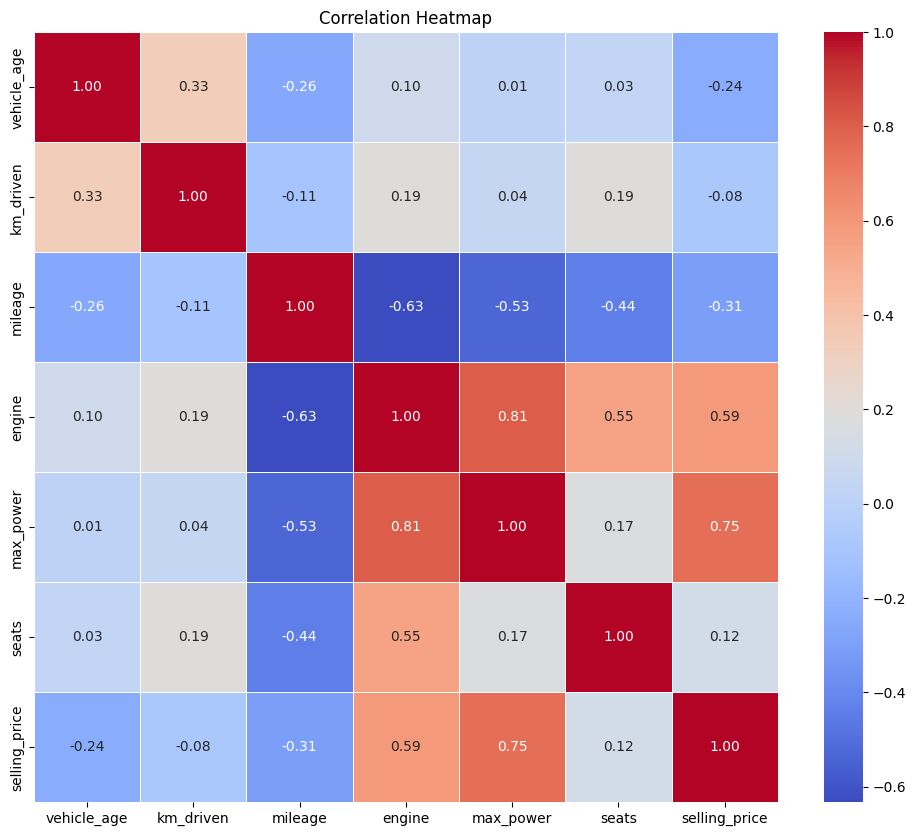

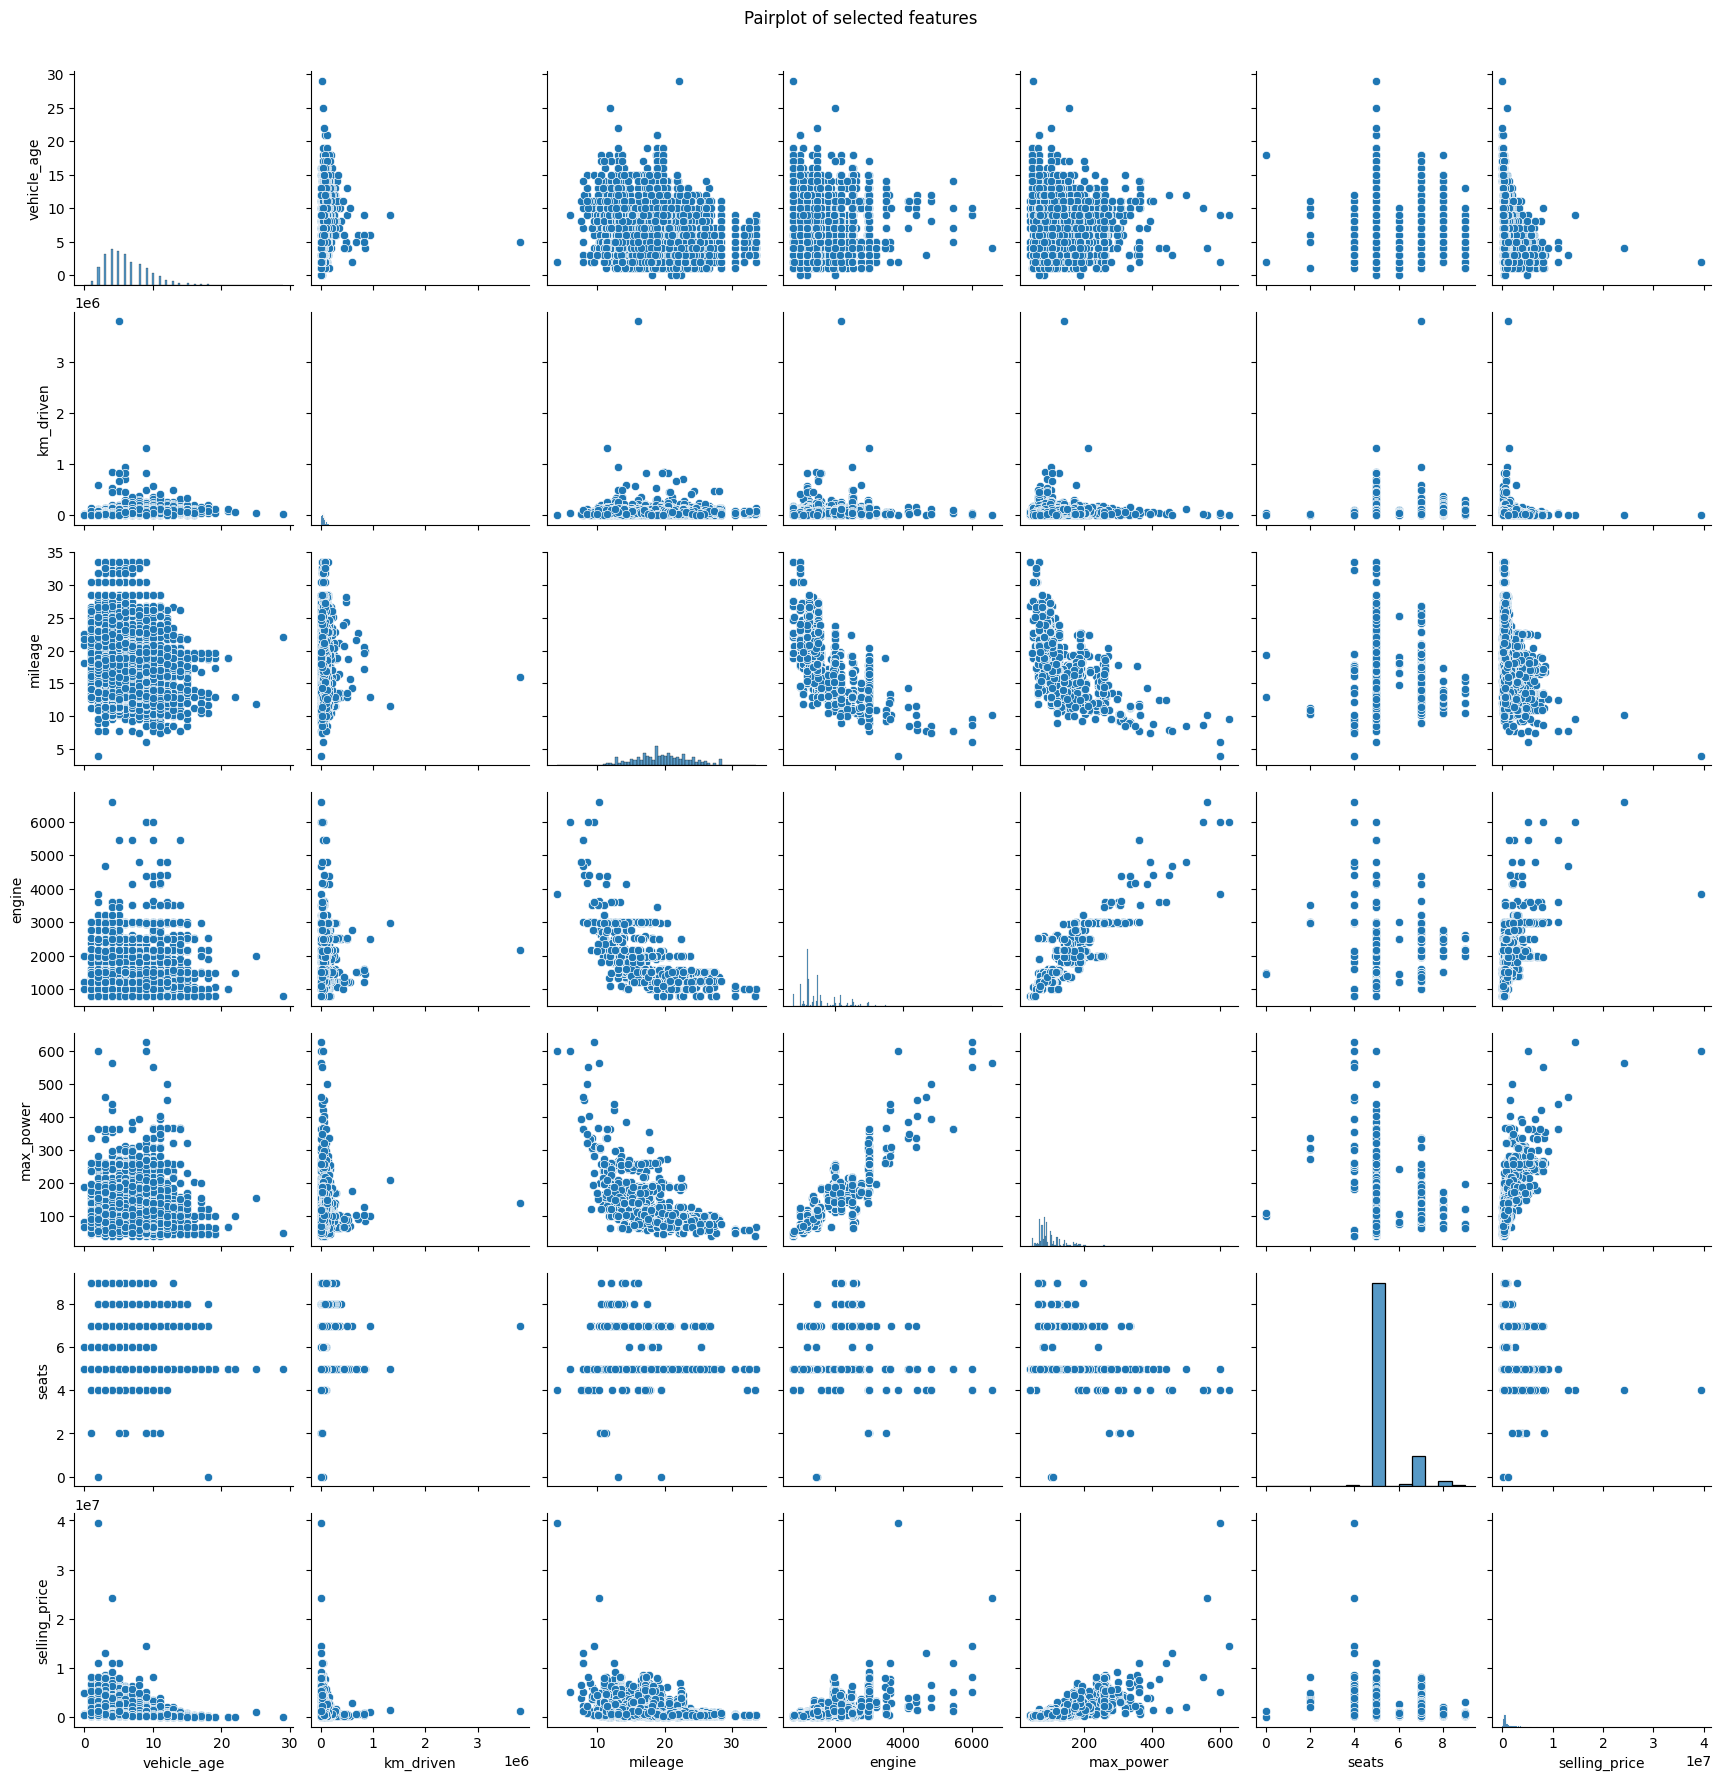

In [10]:
# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = MultivariateAnalysis()

# Execute the multivariate analysis
multivariate_analyzer.analyze(df[numerical_features])

In [14]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
categorical_cols = [col for col in categorical_cols if col != 'car_name']
numerical_cols = df.select_dtypes(exclude=["object", "category"]).columns
binary_cols = ["car_name"]
print(type(categorical_cols), type(numerical_cols), type(binary_cols))


<class 'list'> <class 'pandas.core.indexes.base.Index'> <class 'list'>
